In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv
/kaggle/input/boston-housing-dataset/BostonHousing.csv


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

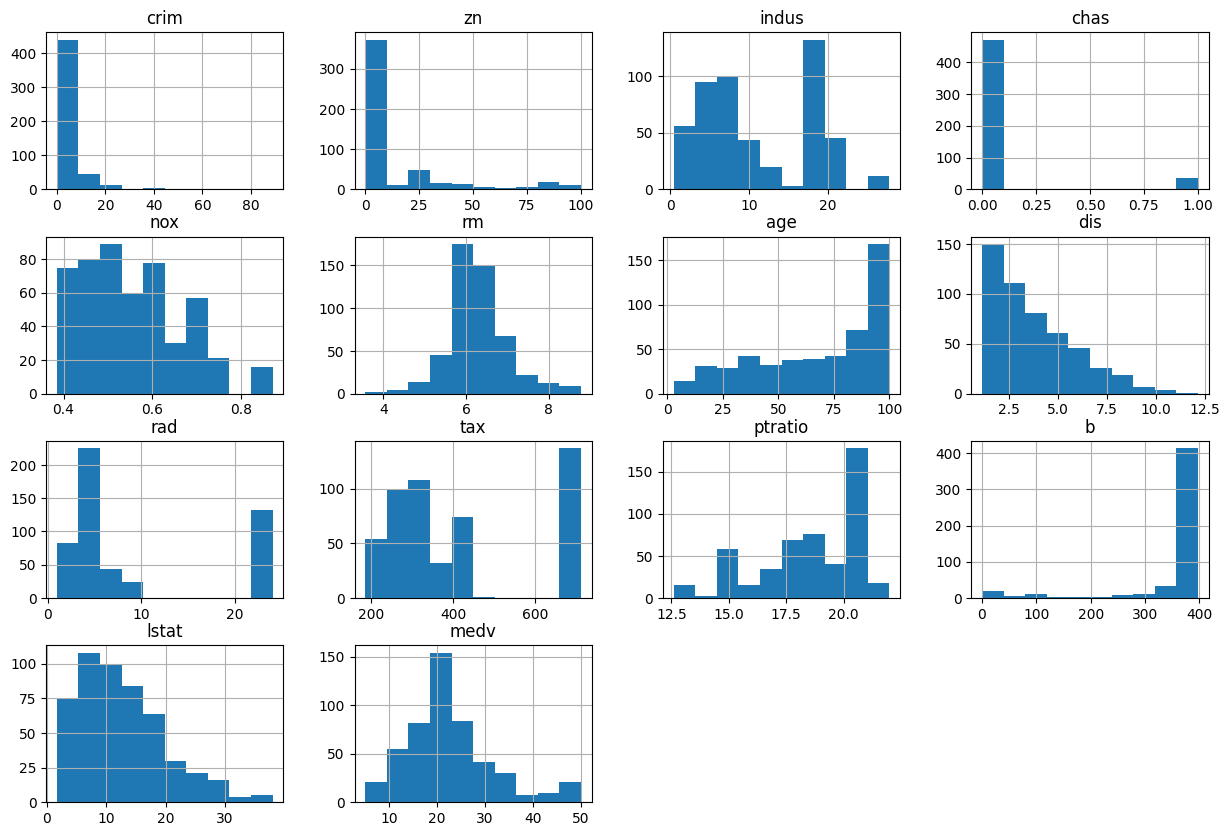

In [15]:
data.hist(figsize=(15,10))

In [16]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###Checking for missing values###

removing null values

In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [19]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit(X[:,5:6])
# X[:,5:6] = imputer.transform(X[:,5:6])

In [21]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


<Axes: >

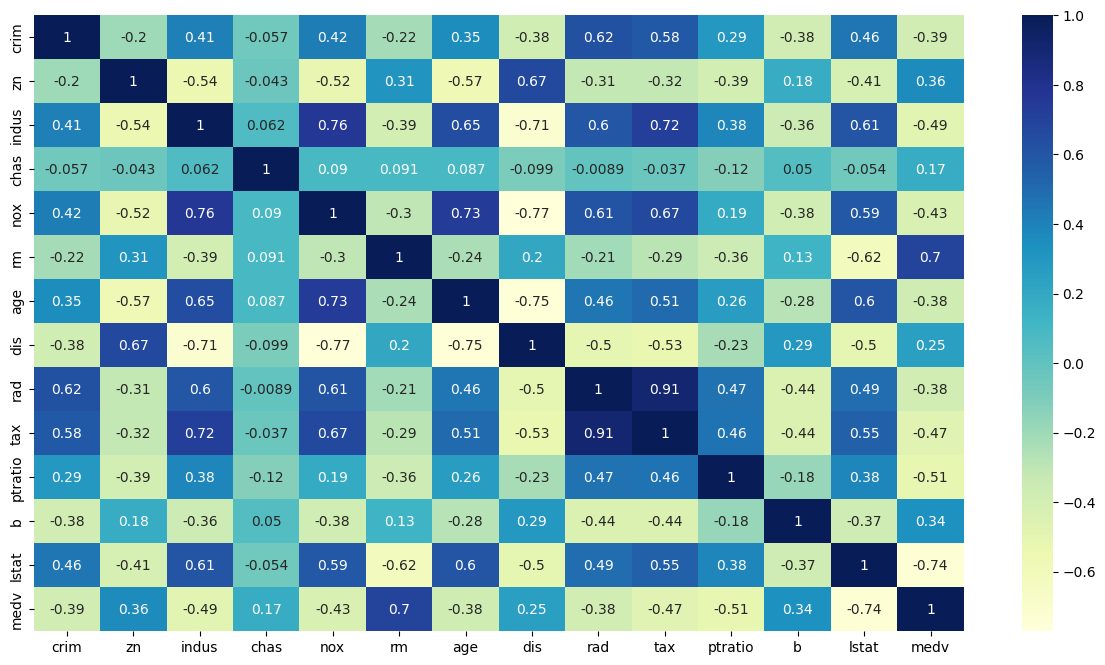

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

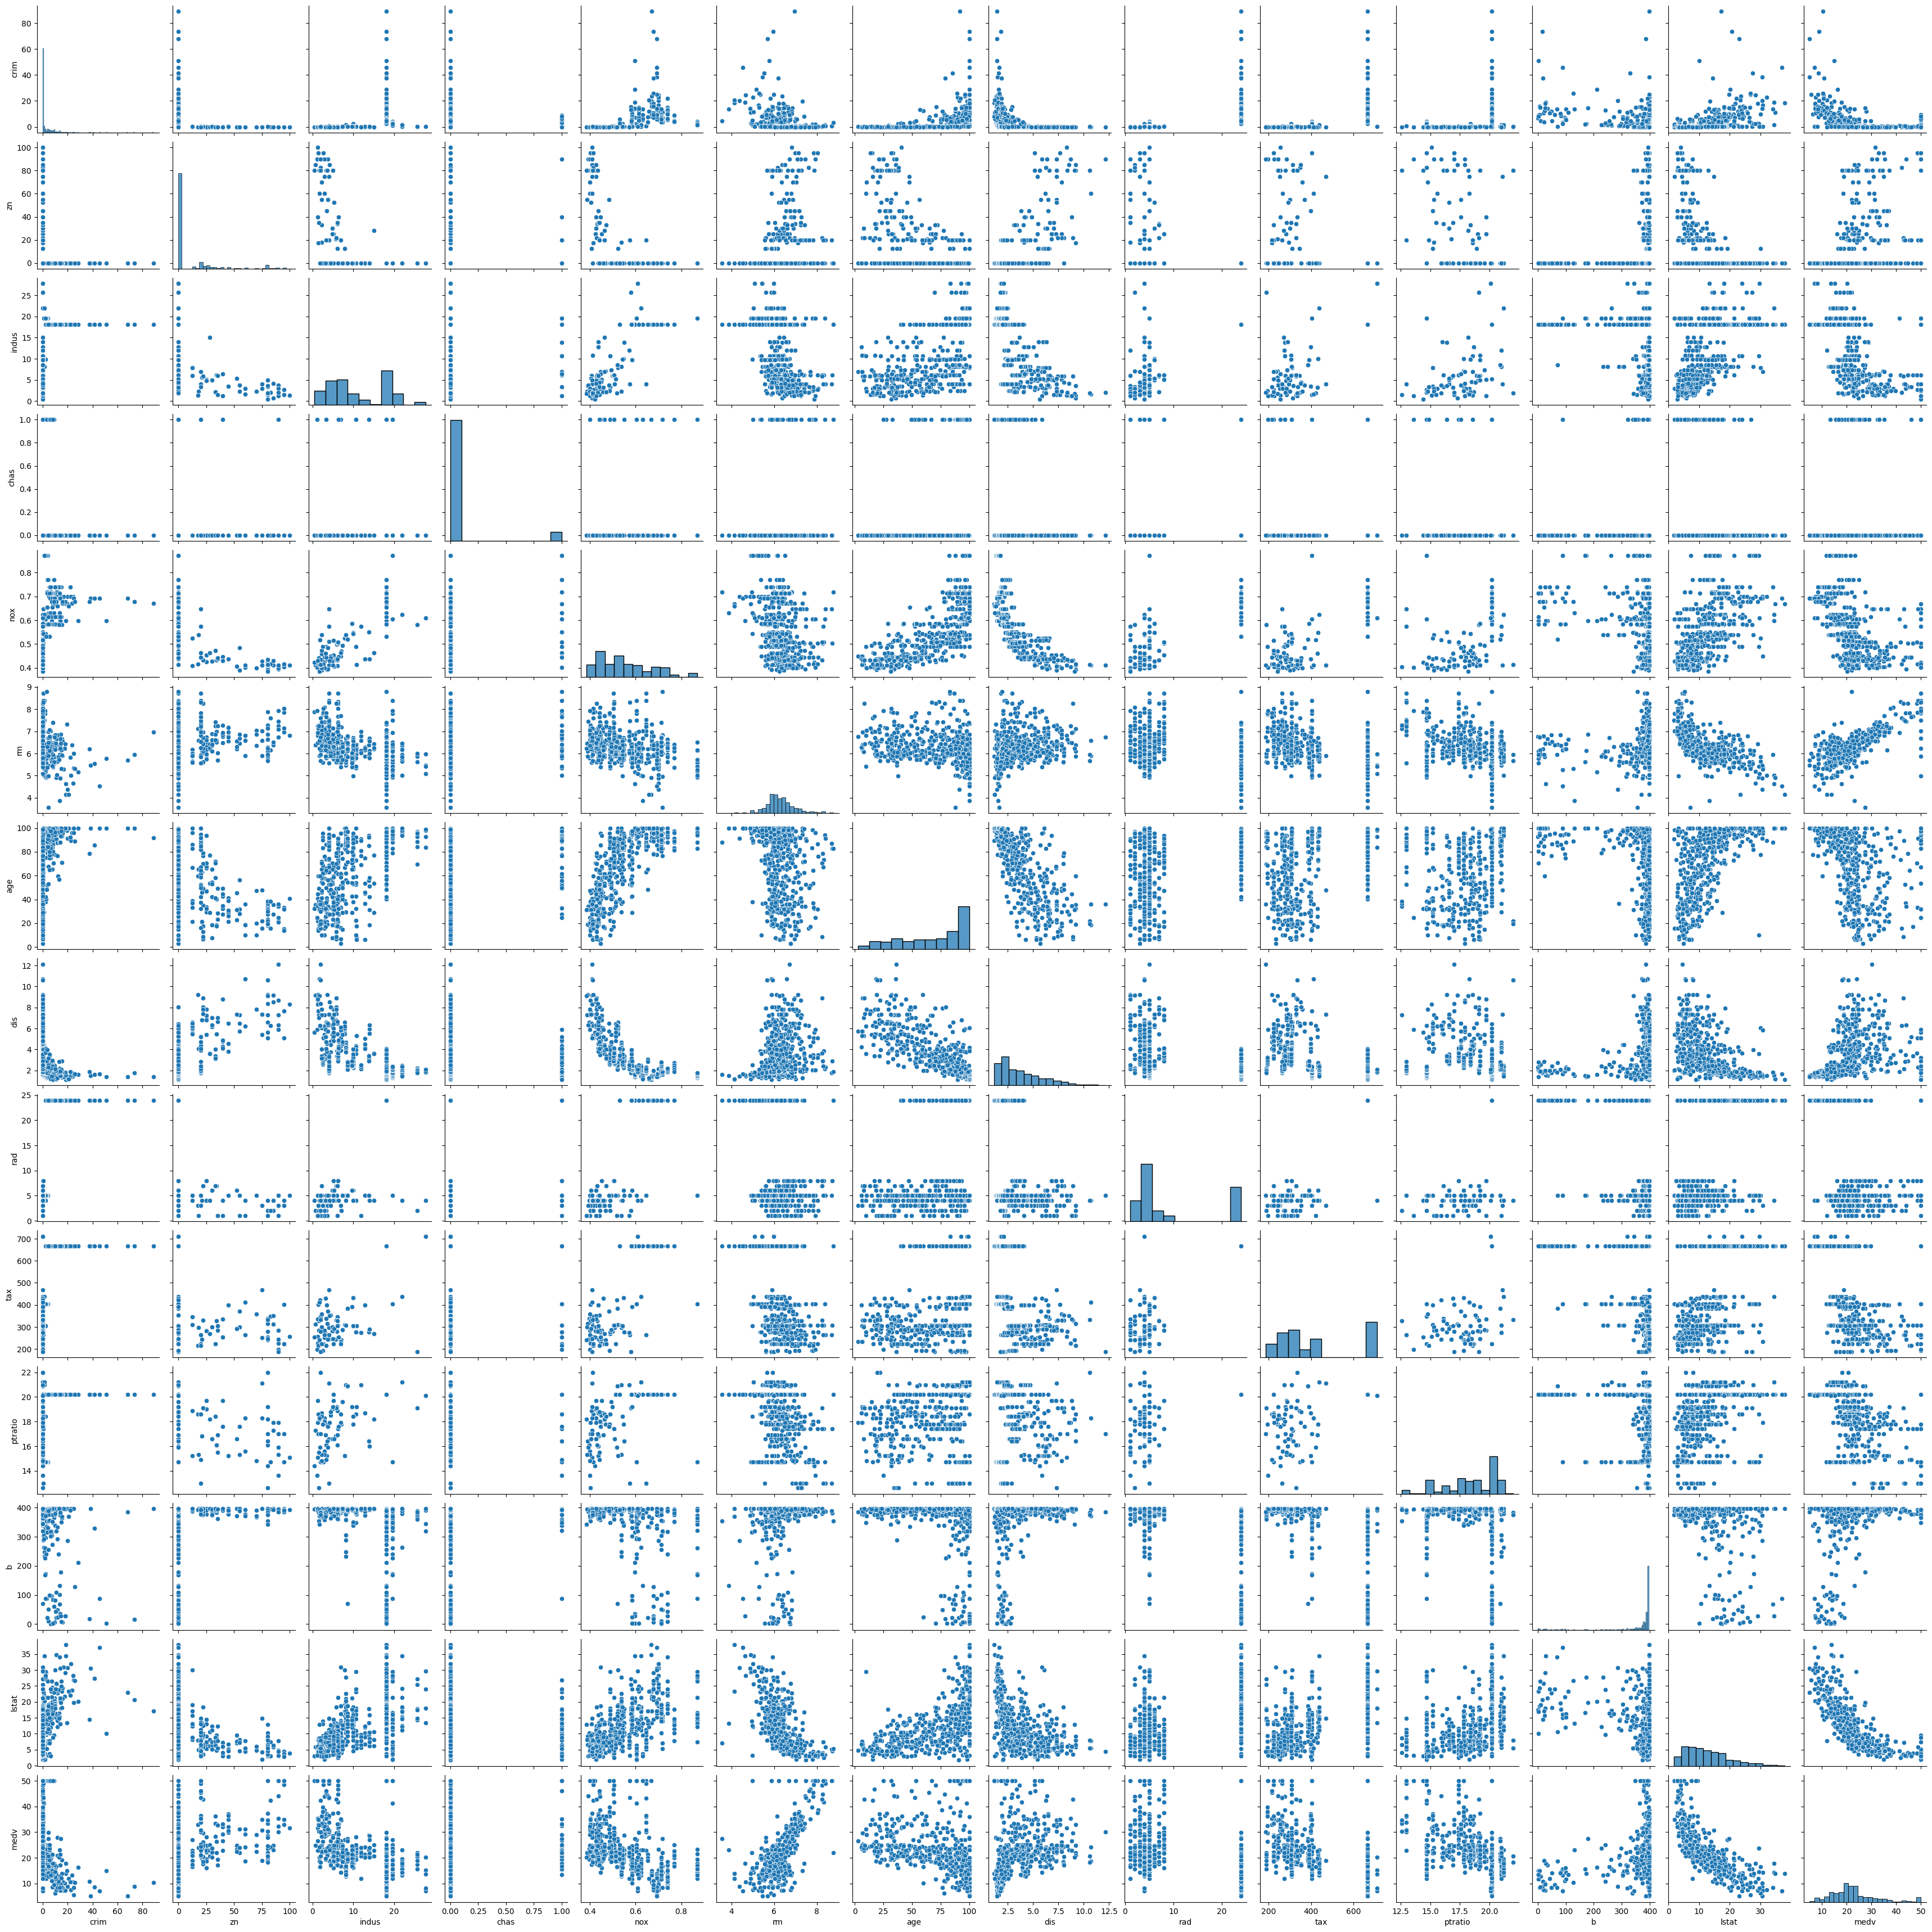

In [23]:
sns.pairplot(data)

Text(0, 0.5, 'Price')

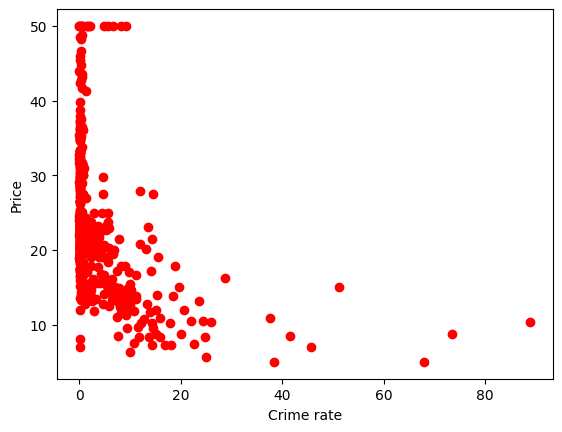

In [24]:
plt.scatter(data['crim'],data['medv'],color = 'red')
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

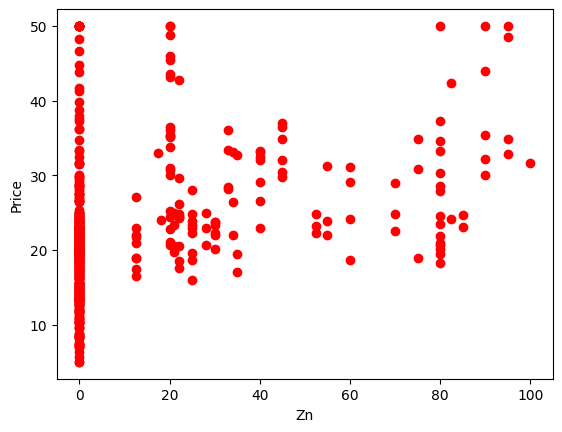

In [25]:
plt.scatter(data['zn'],data['medv'],color = 'red')
plt.xlabel('Zn')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

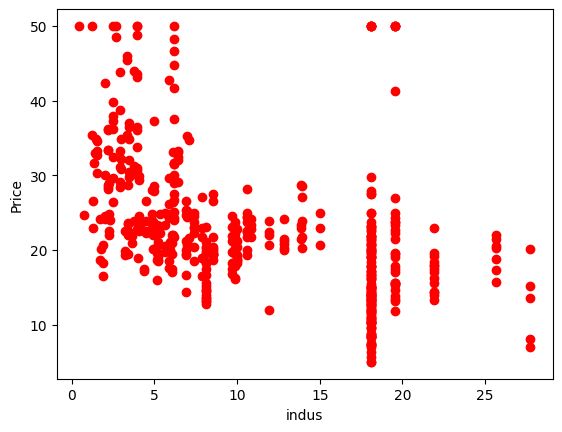

In [26]:
plt.scatter(data['indus'],data['medv'],color = 'red')
plt.xlabel('indus')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

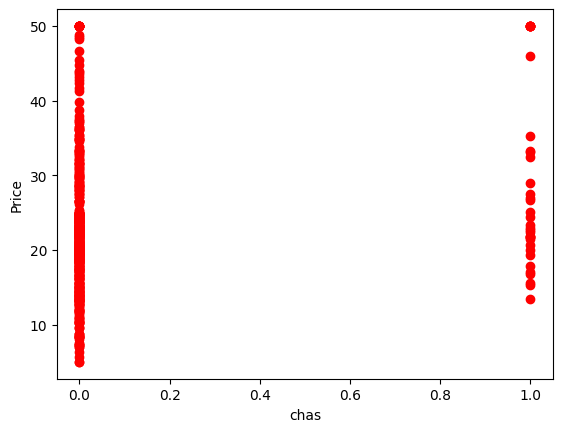

In [27]:
plt.scatter(data['chas'],data['medv'],color = 'red')
plt.xlabel('chas')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

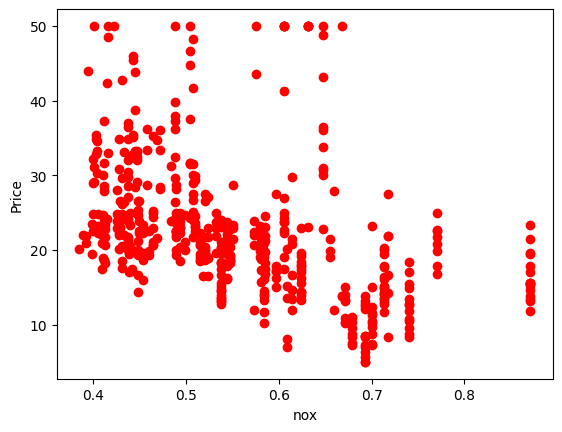

In [28]:
plt.scatter(data['nox'],data['medv'],color = 'red')
plt.xlabel('nox')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

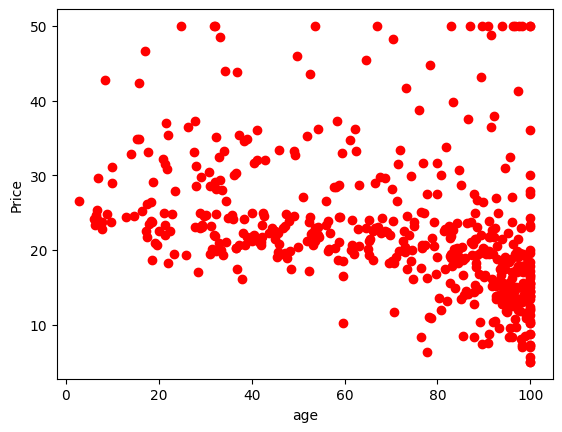

In [29]:
plt.scatter(data['age'],data['medv'],color = 'red')
plt.xlabel('age')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

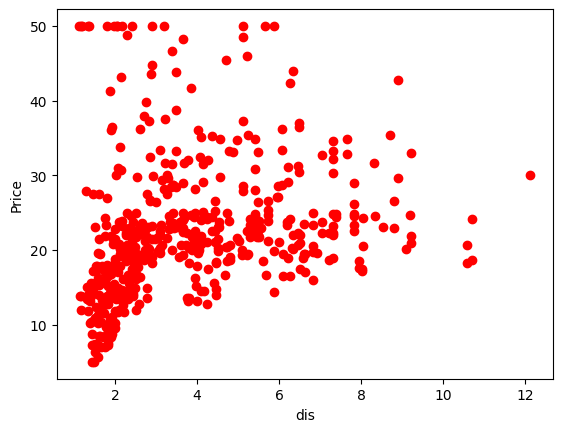

In [30]:
plt.scatter(data['dis'],data['medv'],color = 'red')
plt.xlabel('dis')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

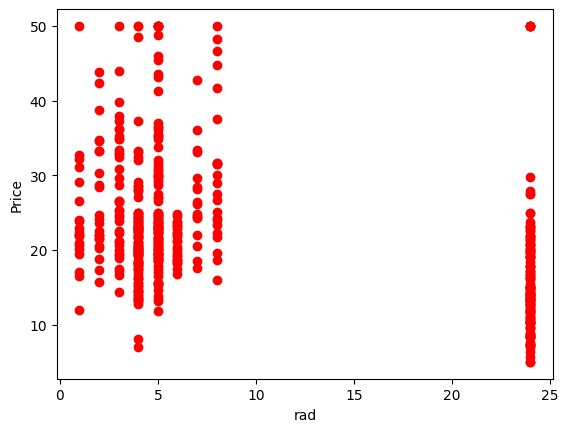

In [31]:
plt.scatter(data['rad'],data['medv'],color = 'red')
plt.xlabel('rad')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

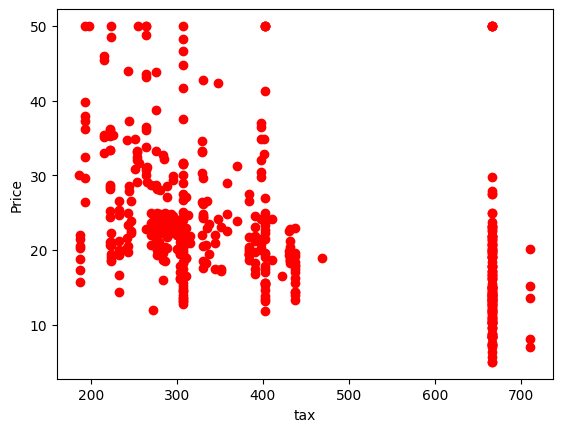

In [32]:
plt.scatter(data['tax'],data['medv'],color = 'red')
plt.xlabel('tax')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

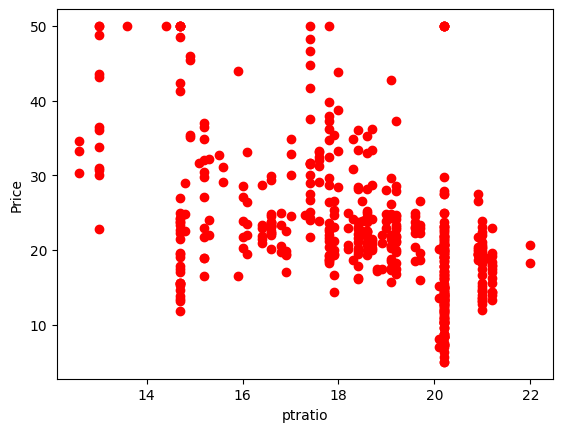

In [33]:
plt.scatter(data['ptratio'],data['medv'],color = 'red')
plt.xlabel('ptratio')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

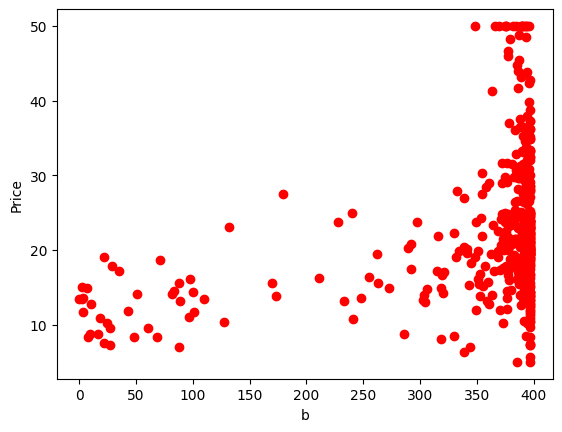

In [34]:
plt.scatter(data['b'],data['medv'],color = 'red')
plt.xlabel('b')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

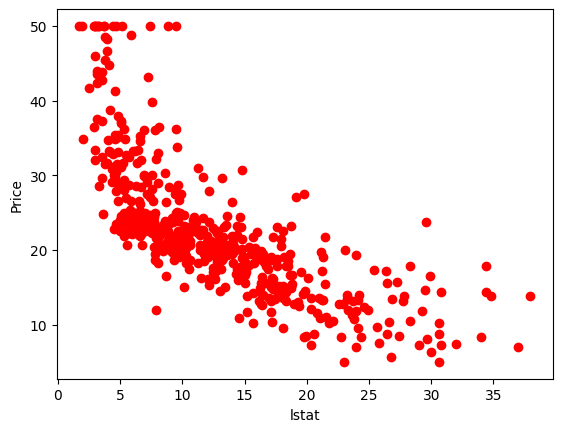

In [35]:
plt.scatter(data['lstat'],data['medv'],color = 'red')
plt.xlabel('lstat')
plt.ylabel('Price')

In [36]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [37]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [38]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 40)

In [40]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
217,0.07013,0.0,13.89,0,0.5500,6.642,85.1,3.4211,5,276,16.4,392.78,9.69
286,0.01965,80.0,1.76,0,0.3850,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
72,0.09164,0.0,10.81,0,0.4130,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
43,0.15936,0.0,6.91,0,0.4480,6.211,6.5,5.7209,3,233,17.9,394.46,7.44
450,6.71772,0.0,18.10,0,0.7130,6.749,92.6,2.3236,24,666,20.2,0.32,17.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,10.67180,0.0,18.10,0,0.7400,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
170,1.20742,0.0,19.58,0,0.6050,5.875,94.6,2.4259,5,403,14.7,292.29,14.43
7,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14


In [41]:
Y_train

217    28.7
286    20.1
72     22.8
43     24.7
450    13.4
       ... 
445    11.8
170    17.4
7      27.1
224    44.8
331    17.1
Name: medv, Length: 350, dtype: float64

In [42]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train

array([[-0.42235402, -0.49073111,  0.41129249, ..., -1.00690082,
         0.39676833, -0.3943664 ],
       [-0.42893619,  2.86428562, -1.3781544 , ..., -0.1518698 ,
        -0.16780762,  0.07691832],
       [-0.4195493 , -0.49073111, -0.04307655, ...,  0.32314744,
         0.37614002, -1.00092728],
       ...,
       [-0.41265027,  0.03349026, -0.47679244, ..., -1.5769215 ,
         0.4422168 ,  0.98166861],
       [-0.39038198, -0.49073111, -0.72315488, ..., -0.53188358,
         0.31149728, -1.20165966],
       [-0.42494882,  0.97708871, -0.74380801, ..., -0.7693922 ,
         0.410447  ,  0.0041892 ]])

In [44]:
X_test

array([[-0.15049775, -0.49073111,  1.25069503, ..., -1.81443012,
        -2.06881138,  0.61802299],
       [-0.42682515,  2.86428562, -1.14064331, ..., -1.14940599,
         0.4422168 , -1.12456679],
       [ 1.76062089, -0.49073111,  1.03236186, ...,  0.79816467,
         0.4422168 ,  2.67771175],
       ...,
       [-0.42557339, -0.49073111, -1.15982122, ..., -0.7693922 ,
         0.12970339, -0.48164134],
       [-0.33367071, -0.49073111, -0.43696139, ...,  1.17817846,
         0.41386666,  0.56711261],
       [-0.4120283 ,  0.55771162, -0.88100386, ...,  0.56065606,
         0.42247098,  0.10891913]])

MODEL TRAINING****

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

#print coefficients

In [46]:
print(reg.coef_)

[-0.70493609  0.91029674 -0.02102435  0.69839918 -1.7004674   2.48395515
  0.41713339 -2.4826731   2.40937844 -1.78037559 -2.14171777  0.83128944
 -3.91811806]


In [47]:
print(reg.intercept_)

22.53971428571429


In [48]:
X_test

array([[-0.15049775, -0.49073111,  1.25069503, ..., -1.81443012,
        -2.06881138,  0.61802299],
       [-0.42682515,  2.86428562, -1.14064331, ..., -1.14940599,
         0.4422168 , -1.12456679],
       [ 1.76062089, -0.49073111,  1.03236186, ...,  0.79816467,
         0.4422168 ,  2.67771175],
       ...,
       [-0.42557339, -0.49073111, -1.15982122, ..., -0.7693922 ,
         0.12970339, -0.48164134],
       [-0.33367071, -0.49073111, -0.43696139, ...,  1.17817846,
         0.41386666,  0.56711261],
       [-0.4120283 ,  0.55771162, -0.88100386, ...,  0.56065606,
         0.42247098,  0.10891913]])

In [49]:
y_pred = reg.predict(X_test)

In [50]:
y_pred

array([16.48594434, 30.12528209,  7.5655663 , 14.38786673, 37.34110397,
       34.36329365, 18.19806389, 14.85967454, 20.0769692 , 20.84375253,
       32.11195834, 14.86959799, 29.42075324, 28.10442852, 18.97225667,
       17.10326656, 24.13931343, 34.33172747, 21.50282776, 15.09467766,
       17.48392092, 26.64677962, 33.91053853, 41.07471814, 20.09830737,
        6.09818807, 16.53114953, 26.96412548, 20.64725553, 19.88940741,
        9.9099863 , 20.02127043, 30.54057373,  8.88920046, 13.69838443,
       21.95832543, 23.01352596, 26.5136956 , 19.28110488, 19.66624201,
       16.9291621 , 21.43463741, 18.40101441,  7.00992041, 24.87219582,
       17.86944887, 30.4861386 , 15.17311118, 19.75537824,  9.06840145,
       19.81371344, 18.98586974, 33.15860534, 22.10042629, 22.60115717,
       22.34615347, 20.99510528,  9.40281265, 25.13790615, 20.07549745,
       20.18929898, 29.98687204, 23.32851607, 32.36384586, 11.27613469,
       24.75309375, 29.00407009, 24.69130615, 27.76451512, 20.34

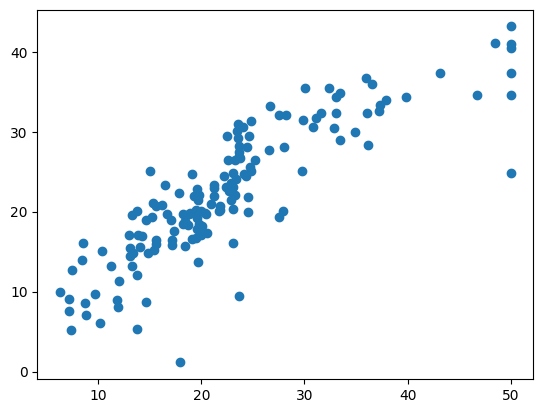

In [51]:
plt.scatter(Y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


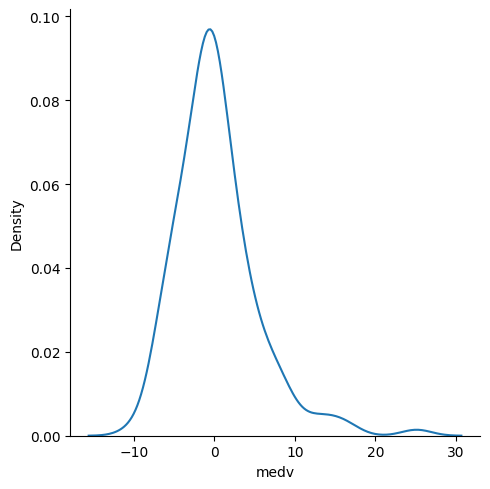

In [54]:
residuals = Y_test - y_pred
sns.displot(residuals, kind='kde') #normal distribution

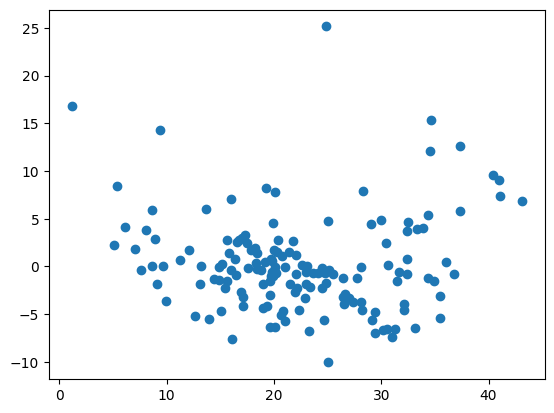

In [55]:
plt.scatter(y_pred, residuals) #uniform distribution

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(y_pred, Y_test))
print(mean_absolute_error(y_pred, Y_test))
print(np.sqrt(mean_squared_error(y_pred, Y_test)))

25.473205408826
3.5386379035716486
5.04709871201525


In [59]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)
print(score)

0.7312572070001293


In [60]:
#adjusted r2_score
1 - (1 - score)*(len(Y_test) - 1)/ (len(Y_test) - X_test.shape[1] - 1)

0.7057560660585358

###Predict new values

In [64]:
X_train[0] #here data should be scaledfirst 
reg.predict(X_train[0].reshape(1,-1))

array([28.44347312])

In [68]:
import pickle
pickle.dump(reg, open('linearReg.pkl', 'wb'))
pickled_model = pickle.load(open('linearReg.pkl', 'rb'))

In [69]:
pickled_model.predict(X_train[0].reshape(1,-1))

array([28.44347312])